# 딥러닝 구조 연습

* 섭씨 -> 화씨
* 공식: T(화씨) = T(섭씨) * 9/5 + 32
* 섭씨와 화씨의 관계는 위의 공식에 의해 이미 알고 있는 내용이다.
* 텐서플로우는 썹씨와 화씨의 데이터를 통해 어떤 방정식을 만들어 내는지 알아봅시다.

In [2]:
!pip install tensorflow

     -------------------------------------- 455.9/455.9 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 23.4 MB/s eta 0:00:00
     ------------------------------------- 438.7/438.7 kB 13.8 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 26.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 27.0 MB/s eta 0:00:00
     ---------------------------------------- 123.4/123.4 kB ? eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 6.7 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 28.6 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 23.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 3.6

In [3]:
import tensorflow
tensorflow.__version__

'2.10.0'

## 딥러닝 구성하는 순서

신경망 생성 -> 모델 compile -> 모델 fit -> 모델 predict -> 모델 저장(save)

## 라이브러리 로드

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

## 데이터 로드

In [5]:
temp_df = pd.read_csv('./data/Celsius-to-Fahrenheit.csv')
temp_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [6]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


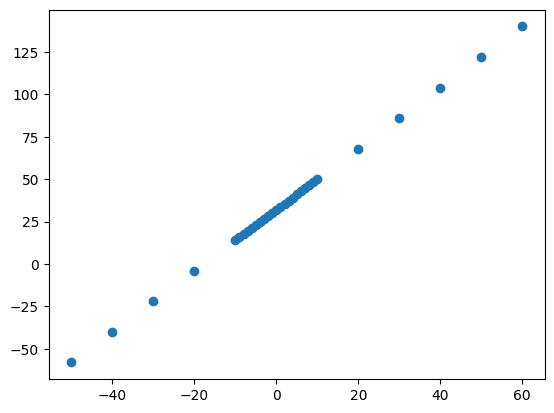

In [8]:
plt.scatter(temp_df['Celsius'], temp_df['Fahrenheit'])

In [9]:
x_train = temp_df['Celsius']
y_train = temp_df['Celsius']

## 데이터 준비

In [1]:
X_train = temp_df['Celsius']

y_train = temp_df['Fahrenheit']

NameError: name 'temp_df' is not defined

## 딥러닝 구성하기

model = Sequential() :  입력층, 은닉층, 출력층을 차곡차곡 쌓아서 순서대로 실행되도록 하는 모델 생성

```python
Dense(노드 갯수, input_dim=입력 갯수)
```


**[참고]**
tensorflow에서 모델을 생성하는 방법
1. Sequential : 해결하려는 문제들에 대해서 95%정도 처리가 가능
2. Functional : Sequential한 방법으로도 해결되지 않을 경우에 적용
3. Subclass Google에서도 추천하지 않는 방법, 모델을 실제로 깊이 있게 연구하는 사람

In [10]:
# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
# 딥러닝 모델 생성
model = Sequential()

In [12]:
model.add(Dense(units=1, input_dim=1))

In [ ]:
#입력1개, 유닛1개인 Dense층 구성
# model.add(Dense(units=1, input_shape=[1]))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 딥러닝 설정하기

* 지정한 모델이 효과적으로 구현될 수 있게 환경을 설정해주는 부분
* 손실함수, 경사하강법,평가지표 등의 정보 설정


* 오차를 어떻게 측정할껀데? 손실함수
* 오차를 가중치에 어떻게 적용할껀데? 경사하강법

In [21]:
# 딥러닝을 설정합니다.
# 회귀이기 때문에 손실함수는 MSE
# 경사하강법은 일반적으로 성능이 제일 좋다는 아담.

# model.compile(loss='mean_squared_error', optimizer='Adam') # 기본 학습률: 0.001
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.5))

## 딥러닝 훈련하기

In [22]:
# epochs = 모든 샘플에 대해 한 번 훈련하는 것을 1에포크, 모든 샘플을 100번 재사용해서 훈련하라

epoch_hist = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 265ms/step - loss: 291.9172
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 33.8602
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 17.1523
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 98.4990
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 121.4027
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 80.5071
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 27.4137
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.8515
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0846
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 36.5792
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 53.4693
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 48.5611
Epoch 13/100
1/1 [============================

In [ ]:
# batch_size = 샘플을 한 번에 몇 개씩 처리할 것인지 정하는 부분, 30개 샘플 중에서 10개씩 끊어서 집어넣어라.
# batch_size가 너무 크면 속도 저하, 너무 작으면 실행 값의 편차가 생겨 불안정해짐.

# epoch_hist = model.fit(x_train, y_train, epochs=100,batch_size=10)

In [23]:
#학습끝나고
#평가하자

epoch_hist.history.keys()

dict_keys(['loss'])

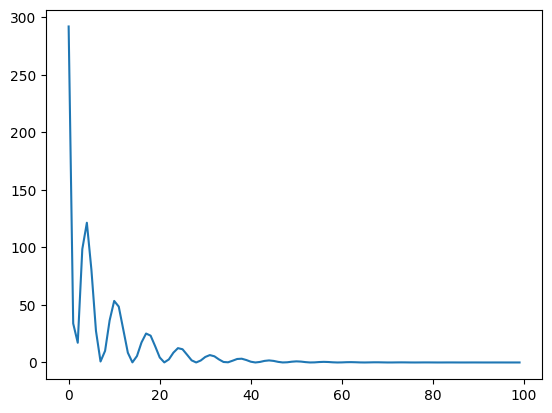

In [24]:
plt.plot(epoch_hist.history['loss'])

## 평가하기

In [25]:
model.evaluate(x_train, y_train)

1/1 [==============================] - 0s 89ms/step - loss: 0.0053


0.0053418586030602455

## 예측하기

In [26]:
#T(화씨) = T(섭씨) * 9/5 + 32

pred_temp = model.predict([Temp_c]) #예측값
real_temp = Temp_c* (9/5) + 32

pred_temp , real_temp

1/1 [==============================] - 0s 58ms/step


(array([[-0.00146217]], dtype=float32), 32.0)

In [27]:
Temp_c = 0
Temp_f = model.predict([Temp_c])
print("predict={}   real={}".format(Temp_f, 9/5*Temp_c +32))

1/1 [==============================] - 0s 39ms/step
predict=[[-0.00146217]]   real=32.0


## 전체 코드

In [28]:
from matplotlib import units
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 딥러닝을 구동하는 데 필요한 케리스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

temp_df = pd.read_csv('./data/Celsius-to-Fahrenheit.csv')
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

# 딥러닝 모뎀 생성
model = Sequential()

# 입력 1개, 유닛 1개인 Dense를 구성
model.add(Dense(units=1, input_dim=1))

# 설정하기
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.5))

# 훈련하기
epoch_hist = model.fit(x_train, y_train, epochs=100,batch_size=10)

# 평가하기
model.evaluate(x_train, y_train)

Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 3398.0679
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 1383.0132
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 939.8943
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 1133.2184
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 1082.2202
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 796.8192
Epoch 7/100
3/3 [==============================] - 0s 1ms/step - loss: 556.8900
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 530.7892
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 546.6631
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 448.4092
Epoch 11/100
3/3 [==============================] - 0s 1ms/step - loss: 341.4353
Epoch 12/100
3/3 [==============================] - 0s 2ms/step - loss: 285.7788
Epoch 13/100
3/3 [===============

5.446357254079714e-10

In [29]:
# 예측하기
Temp_c = 0
Temp_f = model.predict([Temp_c])
print("predict={}   real={}".format(Temp_f, 9/5*Temp_c +32))

1/1 [==============================] - 0s 65ms/step
predict=[[32.000023]]   real=32.0


## 성능향상

In [30]:
#에포크를 더 늘리면..
epoch_hist = model.fit(x_train, y_train, epochs=800,batch_size=10)

Epoch 1/800
3/3 [==============================] - 0s 2ms/step - loss: 5.4464e-10
Epoch 2/800
3/3 [==============================] - 0s 2ms/step - loss: 5.2026e-10
Epoch 3/800
3/3 [==============================] - 0s 1ms/step - loss: 5.4148e-10
Epoch 4/800
3/3 [==============================] - 0s 2ms/step - loss: 5.4148e-10
Epoch 5/800
3/3 [==============================] - 0s 2ms/step - loss: 5.5737e-10
Epoch 6/800
3/3 [==============================] - 0s 2ms/step - loss: 6.1218e-10
Epoch 7/800
3/3 [==============================] - 0s 3ms/step - loss: 5.7677e-10
Epoch 8/800
3/3 [==============================] - 0s 2ms/step - loss: 5.4864e-10
Epoch 9/800
3/3 [==============================] - 0s 2ms/step - loss: 5.3069e-10
Epoch 10/800
3/3 [==============================] - 0s 2ms/step - loss: 5.5603e-10
Epoch 11/800
3/3 [==============================] - 0s 2ms/step - loss: 5.5385e-10
Epoch 12/800
3/3 [==============================] - 0s 2ms/step - loss: 5.1456e-10
Epoch 13/800


In [31]:
# 예측하기
Temp_c = 0
Temp_f = model.predict([Temp_c])
print("predict={}   real={}".format(Temp_f, 9/5*Temp_c +32))

1/1 [==============================] - 0s 37ms/step
predict=[[32.]]   real=32.0


In [32]:
model.get_weights() # 학습결과: 가중치와 bias

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]